In [2]:
pip install torch torchvision matplotlib scikit-image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from google.colab import files
uploaded = files.upload()


Saving datasets.zip to datasets.zip


In [6]:
import zipfile
import os

zip_path = "datasets.zip"
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



In [8]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(f"📁 {root}")
    for file in files:
        print(f"   └── {file}")



📁 /content/dataset
📁 /content/dataset/datasets
📁 /content/dataset/datasets/Set14
📁 /content/dataset/datasets/Set14/LRbicx2
   └── zebra.png
   └── ppt3.png
   └── bridge.png
   └── face.png
   └── man.png
   └── pepper.png
   └── monarch.png
   └── coastguard.png
   └── foreman.png
   └── lenna.png
   └── baboon.png
   └── flowers.png
   └── barbara.png
   └── comic.png
📁 /content/dataset/datasets/Set14/original
   └── zebra.png
   └── ppt3.png
   └── bridge.png
   └── face.png
   └── man.png
   └── pepper.png
   └── monarch.png
   └── coastguard.png
   └── foreman.png
   └── lenna.png
   └── baboon.png
   └── flowers.png
   └── barbara.png
   └── comic.png
📁 /content/dataset/datasets/Set14/LRbicx3
   └── zebra.png
   └── ppt3.png
   └── bridge.png
   └── face.png
   └── man.png
   └── pepper.png
   └── monarch.png
   └── coastguard.png
   └── foreman.png
   └── lenna.png
   └── baboon.png
   └── flowers.png
   └── barbara.png
   └── comic.png
📁 /content/dataset/datasets/Set14/LRbicx4


In [10]:
lr_path = "/content/dataset/datasets/Set5/LRbicx2"
hr_path = "/content/dataset/datasets/Set5/original"


In [11]:
from PIL import Image
import numpy as np
import os

def load_image_pair(lr_dir, hr_dir):
    lr_images, hr_images = [], []
    filenames = sorted(os.listdir(lr_dir))
    for name in filenames:
        if name.endswith(".png"):
            lr = Image.open(os.path.join(lr_dir, name)).convert("YCbCr")
            hr = Image.open(os.path.join(hr_dir, name)).convert("YCbCr")
            y_lr, _, _ = lr.split()
            y_hr, _, _ = hr.split()
            lr_images.append(np.array(y_lr))
            hr_images.append(np.array(y_hr))
    return lr_images, hr_images

lr_images, hr_images = load_image_pair(
    "/content/dataset/datasets/Set5/LRbicx2",
    "/content/dataset/datasets/Set5/original"
)

print(f"Loaded {len(lr_images)} LR-HR image pairs.")


Loaded 5 LR-HR image pairs.


In [12]:
import os
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset

class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.filenames = sorted(os.listdir(lr_dir))
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        lr_path = os.path.join(self.lr_dir, filename)
        hr_path = os.path.join(self.hr_dir, filename)

        lr_img = Image.open(lr_path).convert("YCbCr").split()[0]
        hr_img = Image.open(hr_path).convert("YCbCr").split()[0]

        lr = np.array(lr_img, dtype=np.float32) / 255.0
        hr = np.array(hr_img, dtype=np.float32) / 255.0

        lr = torch.from_numpy(lr).unsqueeze(0)
        hr = torch.from_numpy(hr).unsqueeze(0)

        return lr, hr


In [13]:
from torch.utils.data import DataLoader

train_dataset = SRDataset(
    lr_dir="/content/dataset/datasets/Set5/LRbicx2",
    hr_dir="/content/dataset/datasets/Set5/original"
)

test_dataset = SRDataset(
    lr_dir="/content/dataset/datasets/Set14/LRbicx2",
    hr_dir="/content/dataset/datasets/Set14/original"
)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [16]:
import torch
import torch.nn as nn

class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=9, padding=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 1, kernel_size=5, padding=2)
        )

    def forward(self, x):
        return self.model(x)


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SRCNN().to(device)


In [21]:
def crop_hr_to_sr(hr, sr):
    _, _, h_sr, w_sr = sr.size()
    _, _, h_hr, w_hr = hr.size()
    # Crop hr center to match sr size
    top = (h_hr - h_sr) // 2
    left = (w_hr - w_sr) // 2
    return hr[:, :, top:top+h_sr, left:left+w_sr]


In [22]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for lr, hr in train_loader:
        lr = lr.to(device)
        hr = hr.to(device)
        optimizer.zero_grad()
        lr_upsampled = F.interpolate(lr, scale_factor=2, mode='bicubic', align_corners=False)
        sr = model(lr_upsampled)
        hr_cropped = crop_hr_to_sr(hr, sr)
        loss = criterion(sr, hr_cropped)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.4f}")


Epoch 1/50 - Loss: 0.9852
Epoch 2/50 - Loss: 0.8777
Epoch 3/50 - Loss: 0.7536
Epoch 4/50 - Loss: 0.6402
Epoch 5/50 - Loss: 0.5381
Epoch 6/50 - Loss: 0.4308
Epoch 7/50 - Loss: 0.3198
Epoch 8/50 - Loss: 0.2431
Epoch 9/50 - Loss: 0.1643
Epoch 10/50 - Loss: 0.1127
Epoch 11/50 - Loss: 0.0870
Epoch 12/50 - Loss: 0.0742
Epoch 13/50 - Loss: 0.0746
Epoch 14/50 - Loss: 0.0734
Epoch 15/50 - Loss: 0.0688
Epoch 16/50 - Loss: 0.0638
Epoch 17/50 - Loss: 0.0609
Epoch 18/50 - Loss: 0.0586
Epoch 19/50 - Loss: 0.0562
Epoch 20/50 - Loss: 0.0538
Epoch 21/50 - Loss: 0.0516
Epoch 22/50 - Loss: 0.0504
Epoch 23/50 - Loss: 0.0489
Epoch 24/50 - Loss: 0.0477
Epoch 25/50 - Loss: 0.0465
Epoch 26/50 - Loss: 0.0457
Epoch 27/50 - Loss: 0.0446
Epoch 28/50 - Loss: 0.0437
Epoch 29/50 - Loss: 0.0432
Epoch 30/50 - Loss: 0.0425
Epoch 31/50 - Loss: 0.0419
Epoch 32/50 - Loss: 0.0414
Epoch 33/50 - Loss: 0.0407
Epoch 34/50 - Loss: 0.0403
Epoch 35/50 - Loss: 0.0399
Epoch 36/50 - Loss: 0.0395
Epoch 37/50 - Loss: 0.0392
Epoch 38/5

In [24]:
def psnr(sr, hr):
    mse = torch.mean((sr - hr) ** 2)
    if mse == 0:
        return 100
    return 20 * torch.log10(1.0 / torch.sqrt(mse))


In [25]:
with torch.no_grad():
    total_psnr = 0
    for lr, hr in test_loader:
        lr = lr.to(device)
        hr = hr.to(device)
        lr_upsampled = F.interpolate(lr, scale_factor=2, mode='bicubic', align_corners=False)
        sr = model(lr_upsampled)
        hr_cropped = crop_hr_to_sr(hr, sr)
        total_psnr += psnr(sr, hr_cropped).item()
    print(f"Average PSNR on Set14: {total_psnr / len(test_loader):.2f} dB")


Average PSNR on Set14: 20.04 dB


In [29]:
# 1. Imports and SRCNN Model
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=9, padding=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 1, kernel_size=5, padding=2)
        )
    def forward(self, x):
        return self.model(x)

# 2. Dataset class for Y channel images
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir):
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.filenames = sorted(os.listdir(lr_dir))
    def __len__(self):
        return len(self.filenames)
    def __getitem__(self, idx):
        filename = self.filenames[idx]
        lr_path = os.path.join(self.lr_dir, filename)
        hr_path = os.path.join(self.hr_dir, filename)
        lr_img = Image.open(lr_path).convert("YCbCr").split()[0]
        hr_img = Image.open(hr_path).convert("YCbCr").split()[0]
        lr = np.array(lr_img, dtype=np.float32) / 255.0
        hr = np.array(hr_img, dtype=np.float32) / 255.0
        lr = torch.from_numpy(lr).unsqueeze(0)
        hr = torch.from_numpy(hr).unsqueeze(0)
        return lr, hr

# 3. Helper function to crop HR to SRCNN output size
def crop_hr_to_sr(hr, sr):
    _, _, h_sr, w_sr = sr.size()
    _, _, h_hr, w_hr = hr.size()
    top = (h_hr - h_sr) // 2
    left = (w_hr - w_sr) // 2
    return hr[:, :, top:top+h_sr, left:left+w_sr]

# 4. PSNR calculation
def psnr(sr, hr):
    mse = torch.mean((sr - hr) ** 2)
    if mse == 0:
        return 100
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

# 5. Set dataset paths
train_lr_dir = "/content/dataset/datasets/Set5/LRbicx2"
train_hr_dir = "/content/dataset/datasets/Set5/original"

test_lr_dir = "/content/dataset/datasets/Set14/LRbicx2"
test_hr_dir = "/content/dataset/datasets/Set14/original"

train_dataset = SRDataset(train_lr_dir, train_hr_dir)
test_dataset = SRDataset(test_lr_dir, test_hr_dir)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 6. Device, model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SRCNN().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 7. Training loop with cropping HR
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for lr, hr in train_loader:
        lr = lr.to(device)
        hr = hr.to(device)
        optimizer.zero_grad()

        # Upsample LR to HR size using bicubic interpolation
        lr_upsampled = F.interpolate(lr, scale_factor=2, mode='bicubic', align_corners=False)

        # SRCNN output
        sr = model(lr_upsampled)

        # Crop HR to match SRCNN output size
        hr_cropped = crop_hr_to_sr(hr, sr)

        # Compute loss
        loss = criterion(sr, hr_cropped)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.4f}")

# 8. Evaluation loop with PSNR calculation and HR cropping
model.eval()
with torch.no_grad():
    total_psnr = 0
    for lr, hr in test_loader:
        lr = lr.to(device)
        hr = hr.to(device)

        lr_upsampled = F.interpolate(lr, scale_factor=2, mode='bicubic', align_corners=False)
        sr = model(lr_upsampled)

        hr_cropped = crop_hr_to_sr(hr, sr)

        total_psnr += psnr(sr, hr_cropped).item()

    print(f"Average PSNR on Set14: {total_psnr / len(test_loader):.2f} dB")


Epoch 1/50 - Loss: 1.9683
Epoch 2/50 - Loss: 1.7419
Epoch 3/50 - Loss: 1.5513
Epoch 4/50 - Loss: 1.3772
Epoch 5/50 - Loss: 1.2211
Epoch 6/50 - Loss: 1.1109
Epoch 7/50 - Loss: 1.0175
Epoch 8/50 - Loss: 0.9228
Epoch 9/50 - Loss: 0.8056
Epoch 10/50 - Loss: 0.6990
Epoch 11/50 - Loss: 0.5857
Epoch 12/50 - Loss: 0.4718
Epoch 13/50 - Loss: 0.3463
Epoch 14/50 - Loss: 0.2483
Epoch 15/50 - Loss: 0.1676
Epoch 16/50 - Loss: 0.1094
Epoch 17/50 - Loss: 0.0763
Epoch 18/50 - Loss: 0.0657
Epoch 19/50 - Loss: 0.0679
Epoch 20/50 - Loss: 0.0693
Epoch 21/50 - Loss: 0.0666
Epoch 22/50 - Loss: 0.0633
Epoch 23/50 - Loss: 0.0615
Epoch 24/50 - Loss: 0.0609
Epoch 25/50 - Loss: 0.0604
Epoch 26/50 - Loss: 0.0597
Epoch 27/50 - Loss: 0.0587
Epoch 28/50 - Loss: 0.0581
Epoch 29/50 - Loss: 0.0574
Epoch 30/50 - Loss: 0.0568
Epoch 31/50 - Loss: 0.0559
Epoch 32/50 - Loss: 0.0552
Epoch 33/50 - Loss: 0.0545
Epoch 34/50 - Loss: 0.0537
Epoch 35/50 - Loss: 0.0529
Epoch 36/50 - Loss: 0.0522
Epoch 37/50 - Loss: 0.0517
Epoch 38/5

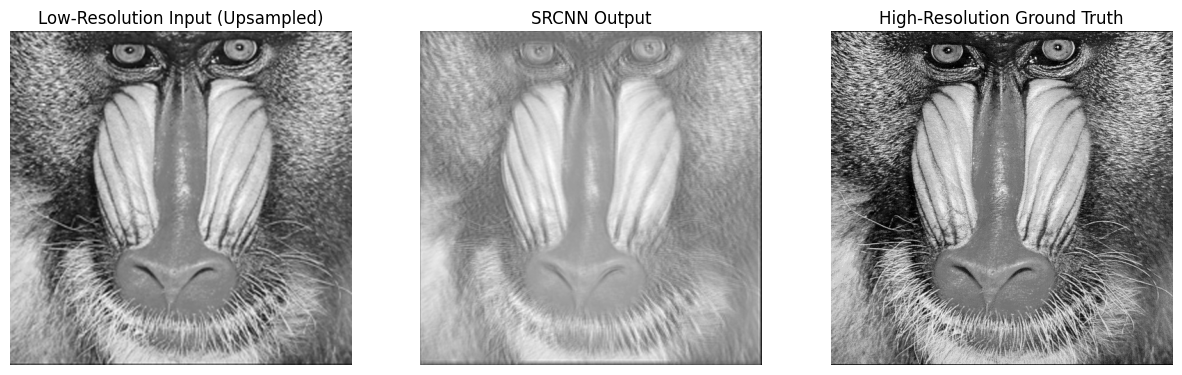

In [34]:
import matplotlib.pyplot as plt

def show_images(lr, sr, hr):
    plt.figure(figsize=(15,5))
    images = [lr, sr, hr]
    titles = ['Low-Resolution Input (Upsampled)', 'SRCNN Output', 'High-Resolution Ground Truth']
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i+1)
        img_np = img.squeeze().cpu().numpy()
        if img_np.max() > 1.0:  # If pixel values are not normalized, scale them
            img_np = img_np / 255.0
        plt.imshow(img_np, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

lr, hr = next(iter(test_loader))
lr, hr = lr.to(device), hr.to(device)
model.eval()
with torch.no_grad():
    lr_up = F.interpolate(lr, scale_factor=2, mode='bicubic', align_corners=False)
    sr = model(lr_up)
    hr_cropped = crop_hr_to_sr(hr, sr)

show_images(lr_up, sr, hr_cropped)


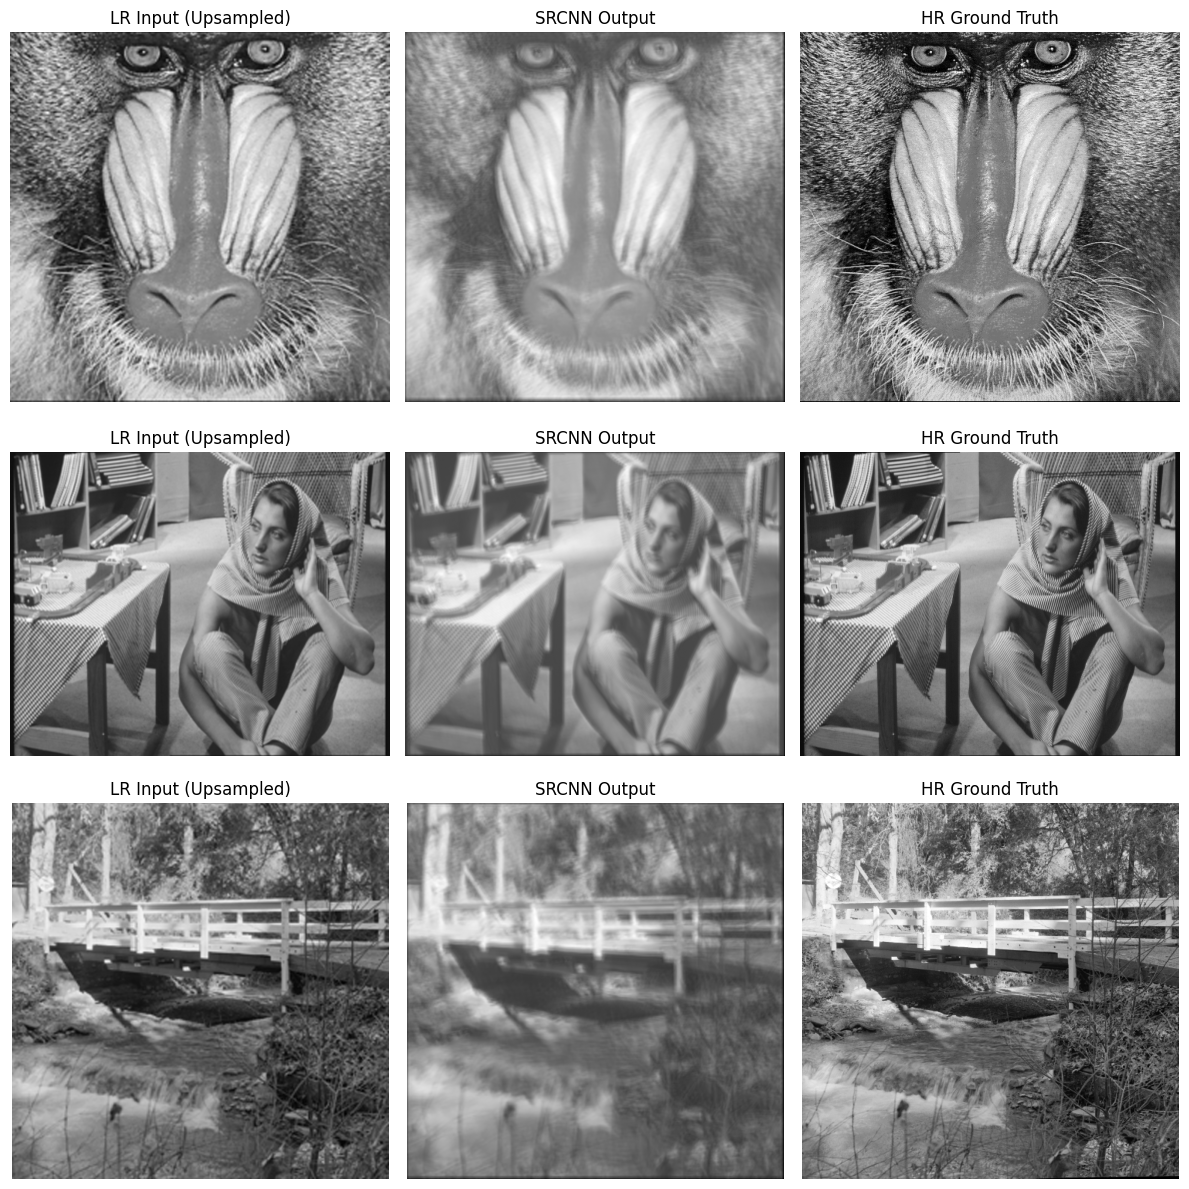

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img_tensor, title=None):
    img = img_tensor.squeeze().cpu().numpy()
    plt.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')

model.eval()

# Plot 3 examples from test_loader
num_examples = 3
fig, axs = plt.subplots(num_examples, 3, figsize=(12, 4*num_examples))

with torch.no_grad():
    for i, (lr, hr) in enumerate(test_loader):
        if i >= num_examples:
            break
        lr = lr.to(device)
        hr = hr.to(device)

        # Upsample LR with bicubic interpolation
        lr_upsampled = F.interpolate(lr, scale_factor=2, mode='bicubic', align_corners=False)

        # SRCNN output
        sr = model(lr_upsampled)

        # Crop HR to SRCNN output size
        hr_cropped = crop_hr_to_sr(hr, sr)

        # Plot LR input (upsampled), SRCNN output, and HR cropped
        imshow(lr_upsampled, title="LR Input (Upsampled)")
        axs[i, 0].imshow(lr_upsampled.squeeze().cpu(), cmap='gray')
        axs[i, 0].set_title("LR Input (Upsampled)")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(sr.squeeze().cpu(), cmap='gray')
        axs[i, 1].set_title("SRCNN Output")
        axs[i, 1].axis('off')

        axs[i, 2].imshow(hr_cropped.squeeze().cpu(), cmap='gray')
        axs[i, 2].set_title("HR Ground Truth")
        axs[i, 2].axis('off')

plt.tight_layout()
plt.show()
